In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
import ast
from IPython.display import display
import numpy as np
import seaborn as sns

override_files = (list(Path('.').glob('**/overrides.yaml')))
df = pd.DataFrame()
for override_file in override_files:    
       
    factors = yaml.safe_load(override_file.read_text())
    factors = dict([elm.split('=') for elm in factors if elm[0] != '+'])
    
    factors = pd.DataFrame(factors,index=range(0,int(factors['epochs']))) #Factors df with a duplicate row per epoch
    factors['epoch'] = list(range(1,int(factors.epochs[0]) + 1 )) #Adding epoch number to each row
    
    log_file =  override_file.parent.parent /'TrainModel.log'
    with open(log_file) as f:
        metrics = [log.split("- ")[-1].strip().split(': ') for log in f.readlines()]
        metrics = pd.DataFrame({k:ast.literal_eval(v) for k,v in metrics}) #Metric df containing the log metrics
    
    #concat factor and metrics dfs to the final df
    df = pd.concat([df, pd.concat([factors, metrics],axis=1)])
    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 0 to 39
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modelconf            7200 non-null   object 
 1   DropoutRate          7200 non-null   float64
 2   epochs               7200 non-null   object 
 3   epoch                7200 non-null   uint8  
 4   Train Accuracy       7200 non-null   float64
 5   Train Loss           7200 non-null   float64
 6   Validation Accuracy  7200 non-null   float64
 7   Validation Loss      7200 non-null   float64
dtypes: float64(5), object(2), uint8(1)
memory usage: 457.0+ KB


In [2]:
df = df.rename(columns={'modelconf.layersconf.Dropout.rate':'DropoutRate'})
df.DropoutRate = df.DropoutRate.astype('float64')
df.epoch = df.epoch.astype('uint8')

In [7]:
desc = df[df.epoch > 20].groupby(['DropoutRate', 'modelconf']).describe()
val_acc = desc['Validation Accuracy'].reset_index().sort_values('50%', ascending=False)
train_acc = desc['Train Accuracy'].reset_index().sort_values('50%', ascending=False)

In [8]:
val_acc[val_acc['50%'] > 0.5]

,DropoutRate,modelconf,count,mean,std,min,25%,50%,75%,max
30,0.70,3LayerConv,100.0,0.808991,0.044597,0.701881,0.783104,0.803546,0.825615,0.952605
18,0.60,3LayerConv,100.0,0.786237,0.031742,0.683068,0.764924,0.788712,0.810872,0.854559
0,0.45,3LayerConv,100.0,0.779674,0.040337,0.604559,0.763296,0.787084,0.804631,0.848408
12,0.55,3LayerConv,100.0,0.765557,0.051522,0.644718,0.732634,0.768994,0.799204,0.884949
6,0.50,3LayerConv,100.0,0.744298,0.052839,0.601664,0.698535,0.758502,0.779758,0.856006
24,0.65,3LayerConv,100.0,0.742312,0.048626,0.607815,0.715268,0.757055,0.776773,0.819103
25,0.65,3LayerConv_BatchNorm1,100.0,0.669855,0.070431,0.469971,0.630336,0.686143,0.712645,0.801375
13,0.55,3LayerConv_BatchNorm1,100.0,0.661360,0.066886,0.446816,0.607724,0.677460,0.711559,0.775687
1,0.45,3LayerConv_BatchNorm1,100.0,0.664219,0.071455,0.505427,0.618669,0.670586,0.720514,0.794501
8,0.50,3LayerConv_BatchNorm2,100.0,0.647366,0.077085,0.494935,0.594067,0.649240,0.696364,0.824891


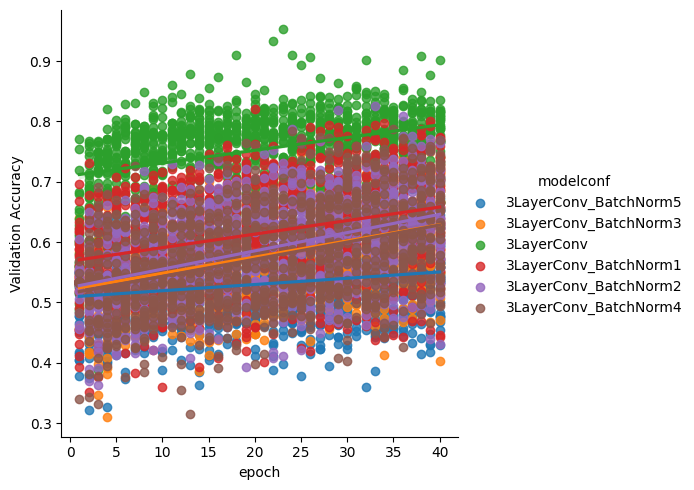

In [11]:
sns.lmplot(data=df,
           x='epoch',
           y='Validation Accuracy',
           hue='modelconf')

TypeError: lmplot() got an unexpected keyword argument 'color'

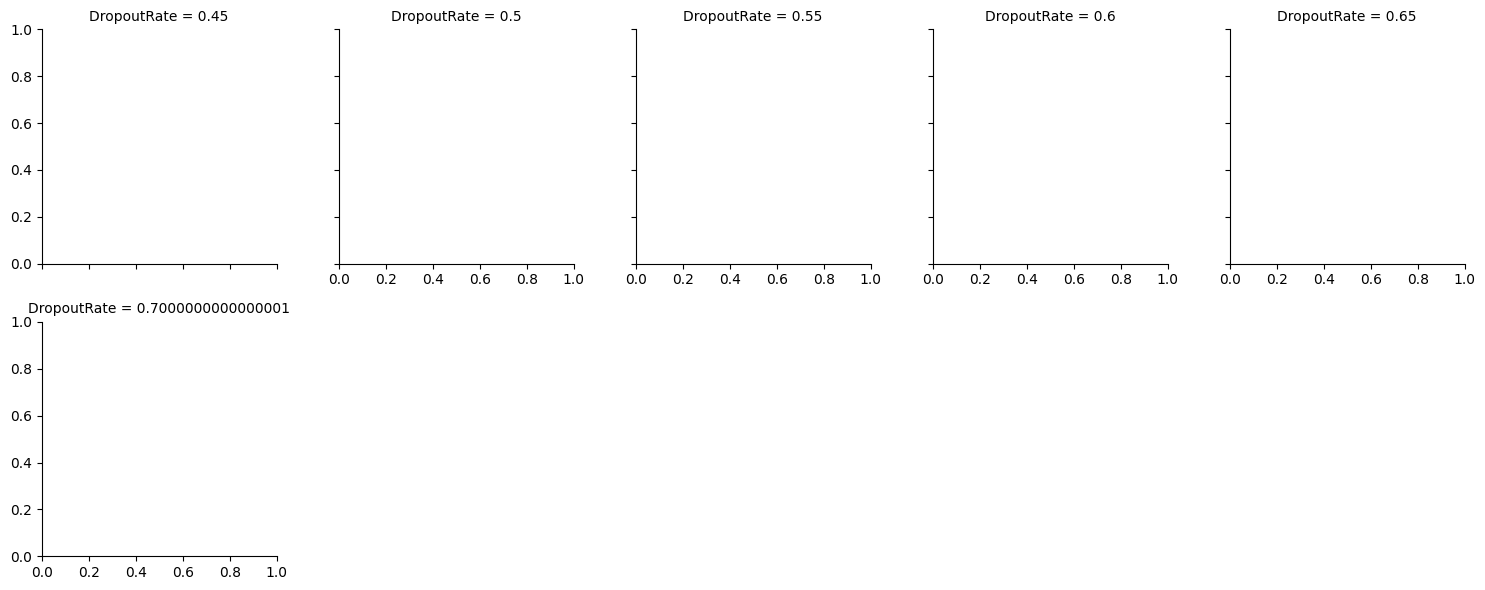

In [10]:
g = sns.FacetGrid(df, col = 'DropoutRate', col_wrap=5)
g.map_dataframe(sns.lmplot, x='epoch', y='Validation Accuracy', hue='modelconf')
plt.tight_layout()

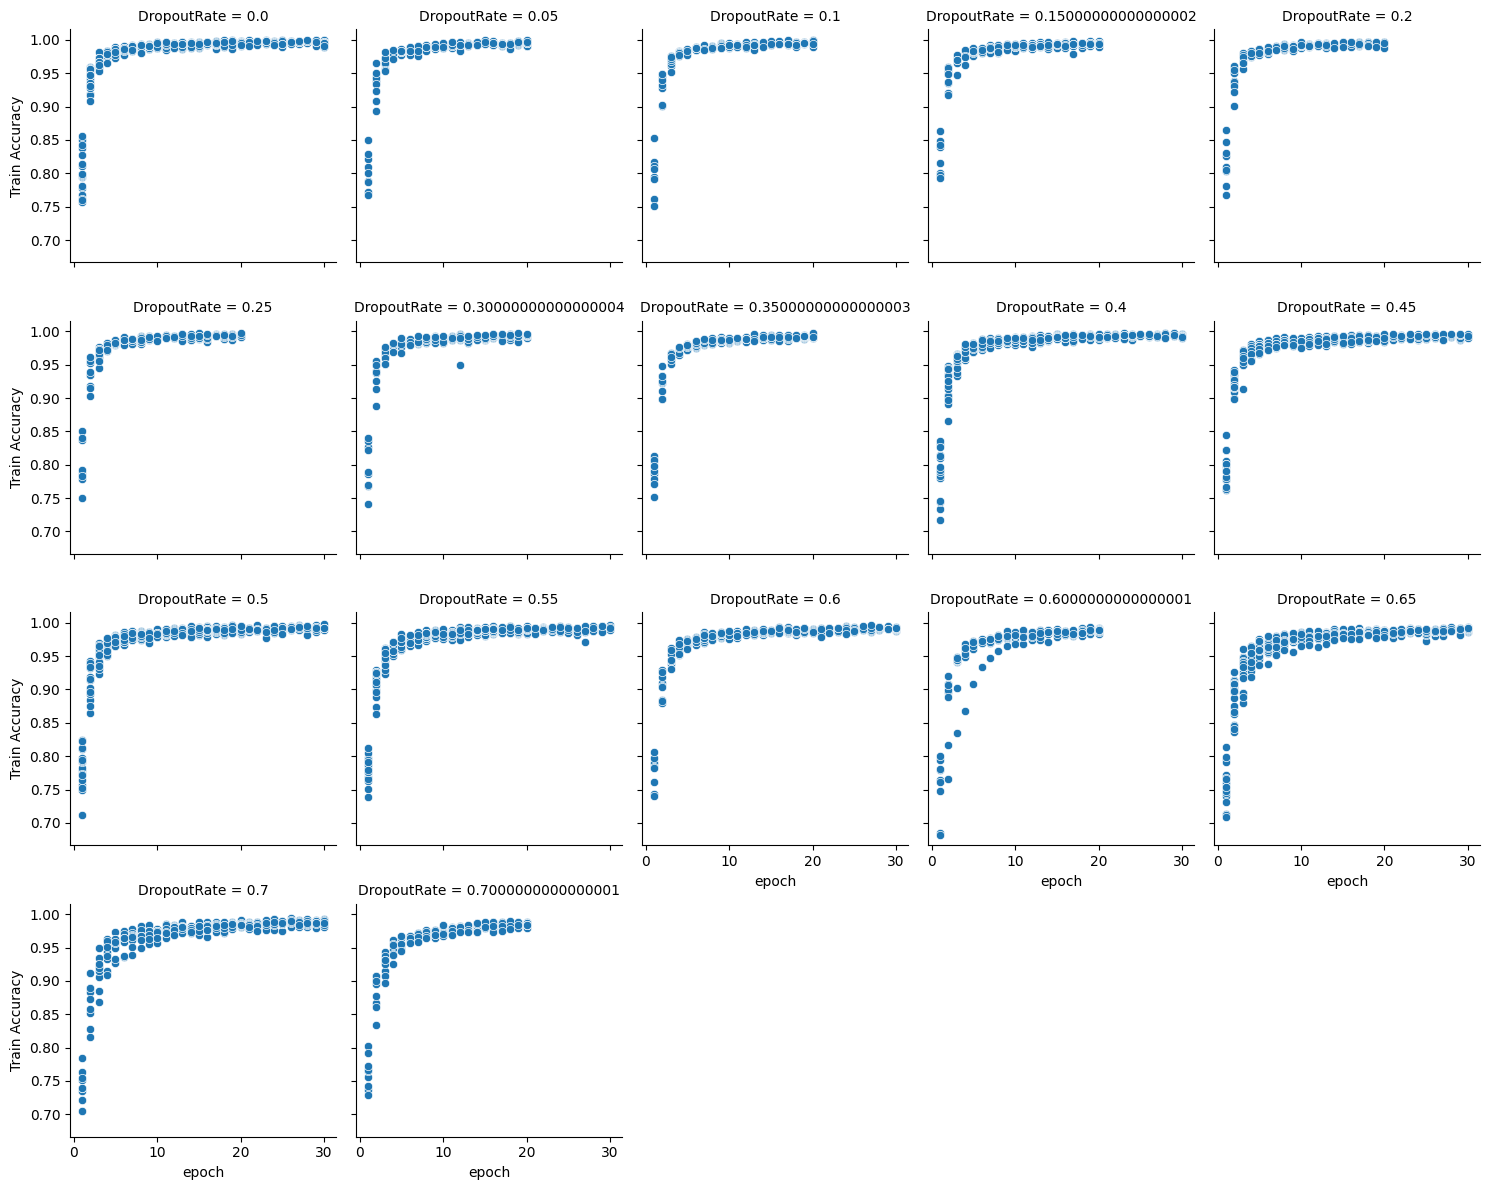

In [6]:
g = sns.FacetGrid(df, col = 'DropoutRate', col_wrap=5)
g.map_dataframe(sns.scatterplot, x='epoch', y='Train Accuracy')
plt.tight_layout()